# Name : R.Hariharan

# Reg. no: 39110371

# College name : Sathyabama Institute of science and technology information.

# Data Science  @IRMS

# Project-2  :  Data visualization:
### "Exploratory Data Analysis : Sports (Indian Premier League)"

# Dataset: https://www.kaggle.com/ramjidoolla/ipl-data-set

# 1. Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

# 2. Load Datasets

In [49]:
matches_df = pd.read_csv("./matches.csv")
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [50]:
deliveries_df = pd.read_csv("./deliveries.csv")
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## -> To merge matches and deliveries dataset

In [51]:
merge_df = pd.merge(deliveries_df,matches_df,left_on='match_id',right_on='id')
merge_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


## size of each dataset

In [52]:
print("============================================")
print("size of matches dataset : ",matches_df.shape )
print("============================================")
print("size of deliveries dataset : ",deliveries_df.shape )
print("============================================")
print("size of merge dataset : ",merge_df.shape )
print("============================================")

size of matches dataset :  (756, 18)
size of deliveries dataset :  (179078, 21)
size of merge dataset :  (179078, 39)


# 3. EDA of Matches dataset

In [53]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [54]:
matches_df.describe(include='all') #statistical analysis of matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2014-05-22,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,O Nandan
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


# 4. Handling Missing Values

In [55]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

- Columns "city", "winner", "player_of_match", "umpire1", "umpire2" have missing values.

- Here "umpire3" column has maximum number of missing value present. So we should delete that column from the dataframe.

- By using drop() function remove the maximum number of missing value in the dataset.

In [56]:
matches_df.drop(["umpire3"],axis=1,inplace=True)

### Handling Missing Values in "city" column

In [57]:
matches_df[matches_df["city"].isnull()][["city","venue"]]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


- As all the seven missing values are from "Dubai International Cricket Stadium". So, we can fill the missing value by "Dubai".

In [58]:
matches_df["city"] = matches_df["city"].fillna("Dubai")

 ### Handling Missing Values in "umpire1", "umpire2", "player_of_match" columns

In [59]:
matches_df[(matches_df["umpire1"].isnull()) | (matches_df["umpire2"].isnull()) | (matches_df["player_of_match"].isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [60]:
matches_df.dropna(subset=['umpire1', 'umpire2', 'player_of_match'],inplace=True)

- delete rows having missing value in columns 'umpire1', 'umpire2', 'player_of_match'.

In [61]:
matches_df.shape # shape of updated matches_df DataFrame

(750, 17)

# 5.EDA of Deliveries Dataset

In [62]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [63]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


# 6. Handling Missing Values 

In [64]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

- Here we can see column have no missing value present.
- So there is no need to drop any data in these columns.

In [65]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# 7. Number of Teams Participated Each Season

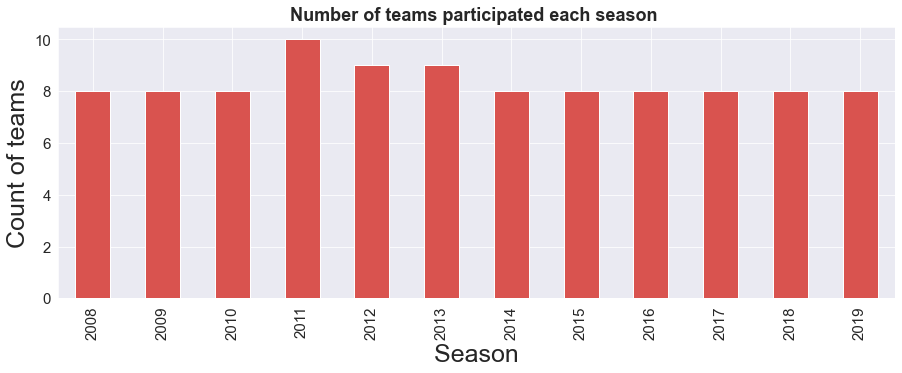

In [79]:
matches_df.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5),color = '#d9534f')
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel(" Count of teams ", size = 25)
plt.xlabel(" Season ", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

- In the year of 2011, 2012, 2013, there were 10,9,9 teams participated while in other seasons have same participated teams were 8.

# 8. Matches Played in Each Season

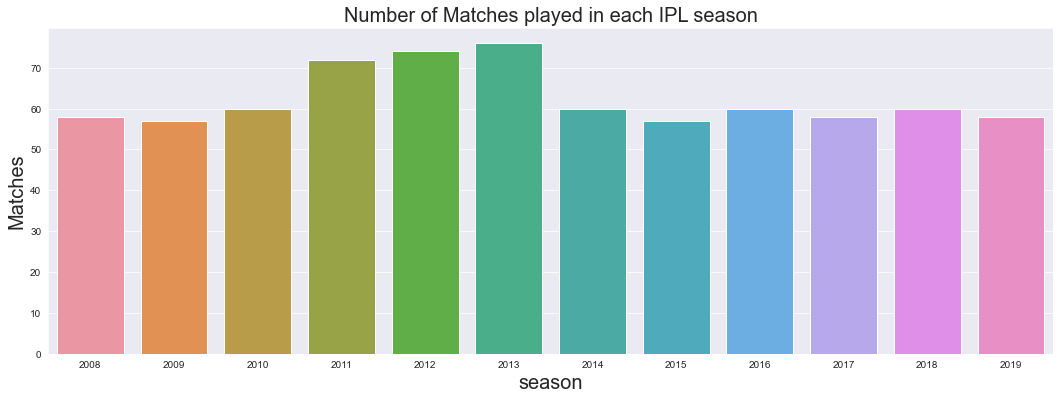

In [83]:
plt.figure(figsize = (18,6))
sns.countplot('season',data=matches_df,)
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=20)
plt.ylabel('Matches',fontsize=20)
plt.show()

# 9. Number of Matches Won by Team

In [85]:
wins = pd.DataFrame({"Winner": matches_df['winner']})
count_wins = wins.value_counts()
print(count_wins)

Winner                     
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     83
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


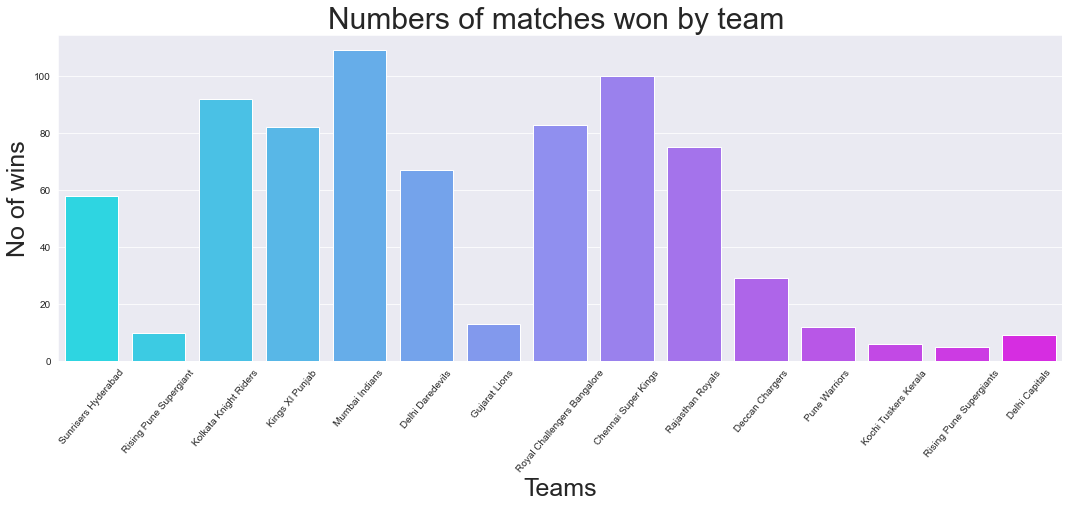

In [91]:
plt.figure(figsize = (18,6))
sns.countplot(x='winner',data=matches_df, palette='cool')
plt.title("Numbers of matches won by team ",fontsize=30)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=25)
plt.ylabel("No of wins",fontsize=25)
plt.show()

In [92]:
labels = [X[0] for X in count_wins.keys()]
print(labels)

['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals', 'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers', 'Gujarat Lions', 'Pune Warriors', 'Rising Pune Supergiant', 'Delhi Capitals', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants']


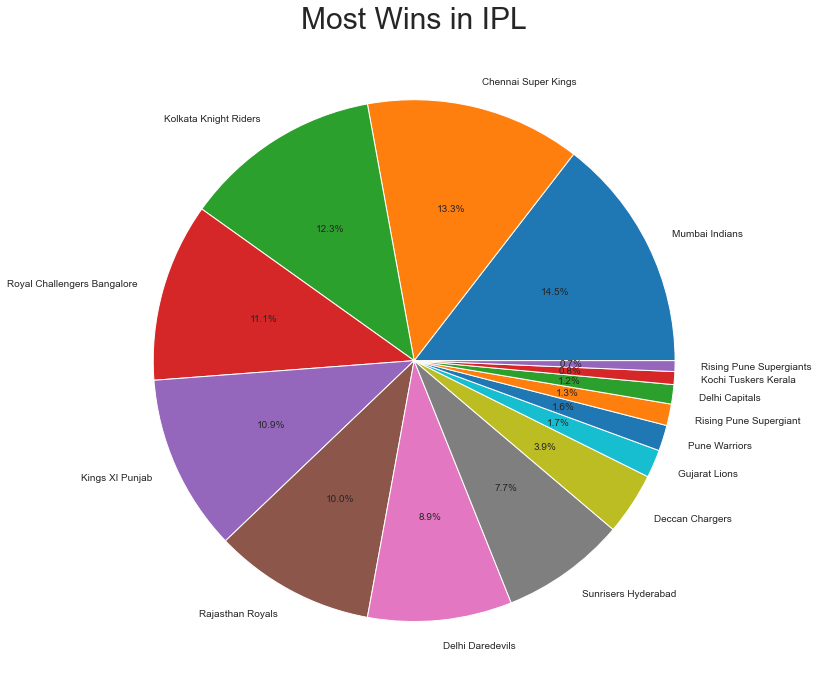

In [93]:
bar,ax = plt.subplots(figsize=(20,12))
ax = plt.pie(x=count_wins,autopct = "%.1f%%" , labels = labels)
plt.title("Most Wins in IPL",fontsize = 30)
plt.show()

- Mumbai Indians has maximum number of winning matches followed by Chennai Super Kings.
- In matches_df DataFrame, "city" column has 32 unique values while "venue" column has 41 distinct values.
- Let's find out which city has many number of venues.

## Find how many stadium present in each cities

In [100]:
city_venue = matches_df.groupby(['city','venue']).count()[ 'season' ]
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   63
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   6
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        66
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         1
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

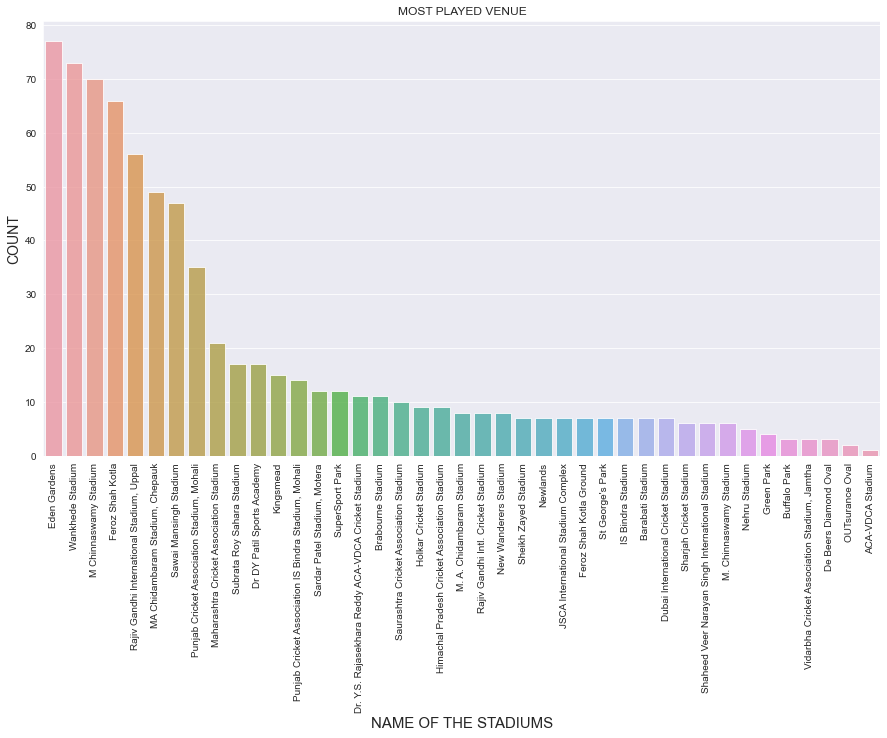

In [102]:
sns.set_style("darkgrid")
ls=matches_df['venue'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('MOST PLAYED VENUE')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE STADIUMS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

# 10.Toss Decision

In [104]:
teams = matches_df['toss_winner'].unique()
teams

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [112]:
decision_making = pd.DataFrame([], columns=['Toss Winner' , 'Decision', 'Times'])

for id,element in enumerate(teams):
    temp_bat = matches_df[(matches_df['toss_winner']== element) & (matches_df['toss_decision'] == 'bat')]
    temp_field = matches_df[(matches_df['toss_winner']== element) & (matches_df['toss_decision'] == 'field')]
    
    #append to decision making
    decision_making = decision_making.append({'Toss Winner': element,'Decision':'bat', 'Times': temp_bat['toss_winner'].count()}, ignore_index = True)
    
    decision_making = decision_making.append({'Toss Winner': element,'Decision':'field', 'Times': temp_field['toss_winner'].count()}, ignore_index = True)

In [113]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,19
1,Royal Challengers Bangalore,field,60
2,Rising Pune Supergiant,bat,0
3,Rising Pune Supergiant,field,6
4,Kolkata Knight Riders,bat,30
5,Kolkata Knight Riders,field,62
6,Kings XI Punjab,bat,26
7,Kings XI Punjab,field,55
8,Sunrisers Hyderabad,bat,20
9,Sunrisers Hyderabad,field,26


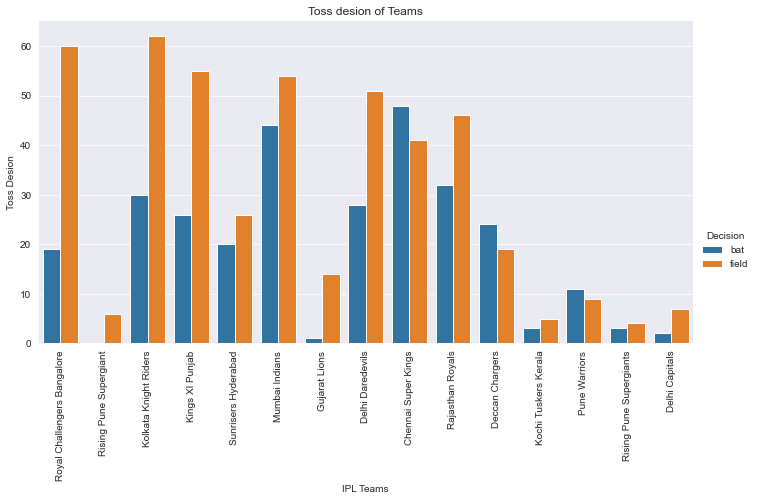

In [114]:
sns.catplot(x = "Toss Winner" , y = "Times" , hue = "Decision" , data = decision_making, kind = 'bar', height=5,aspect=2)
plt.xticks(rotation = 90)
plt.title("Toss desion of Teams")
plt.xlabel("IPL Teams")
plt.ylabel("Toss Desion")
plt.show()

# 11. Which player's performance has mostly led team's win ?

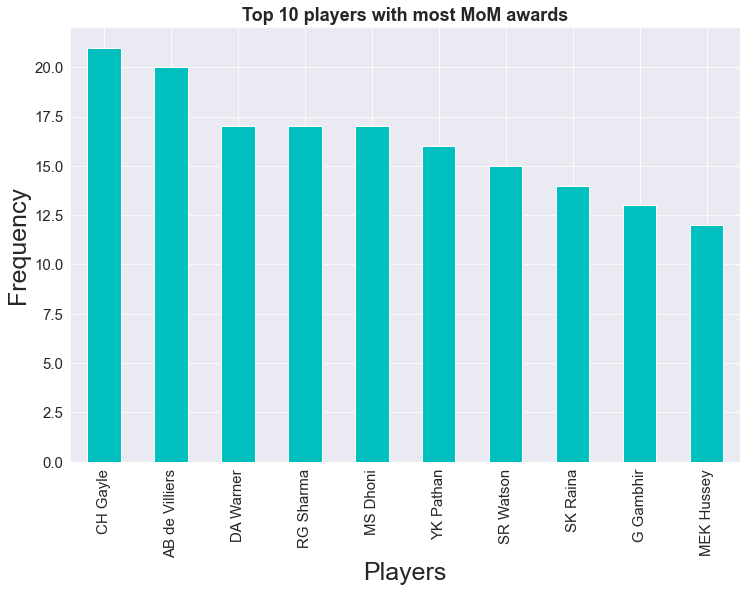

In [116]:
matches_df['player_of_match'].value_counts().head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='c')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)
plt.show()

# 12. Matches won/lost by teams winning toss

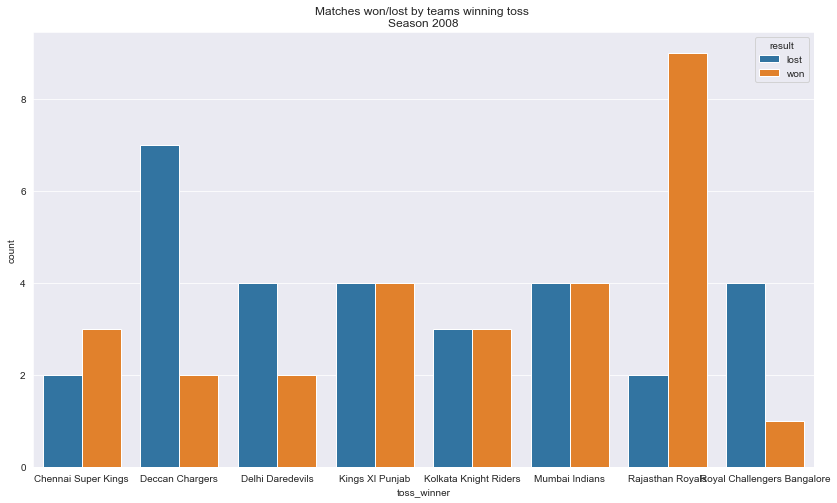

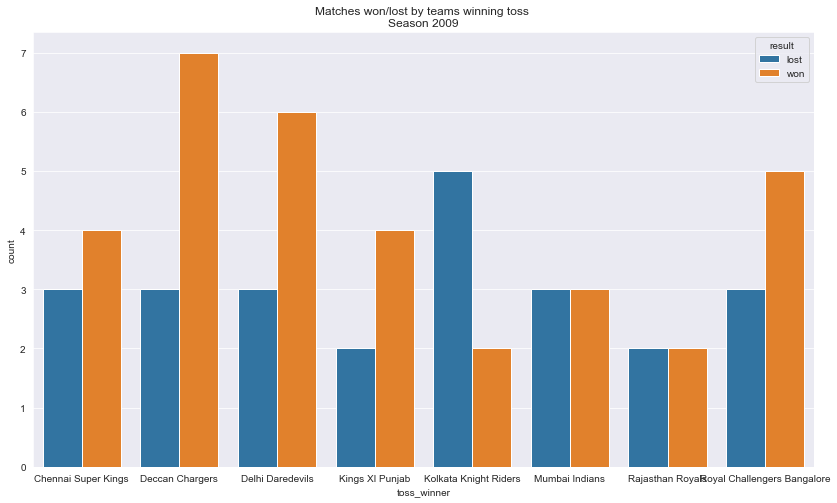

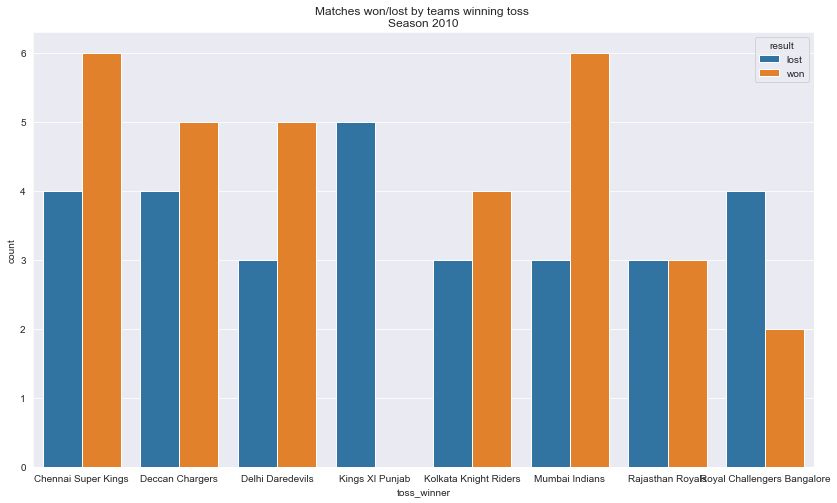

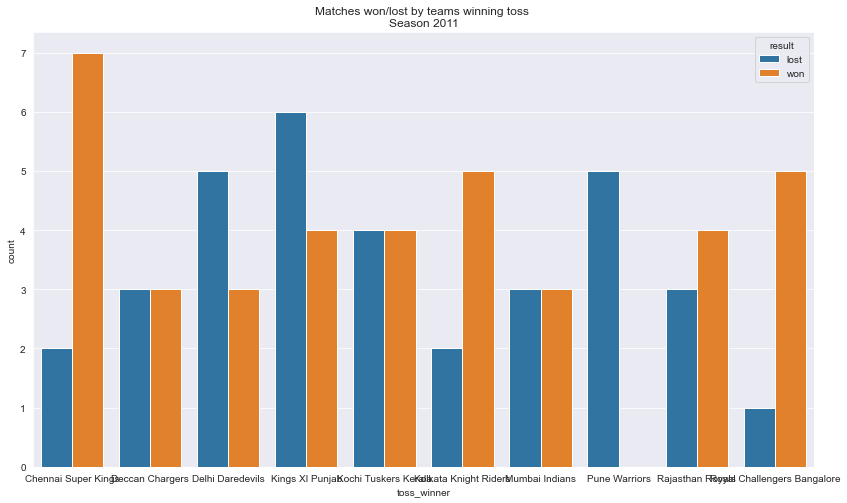

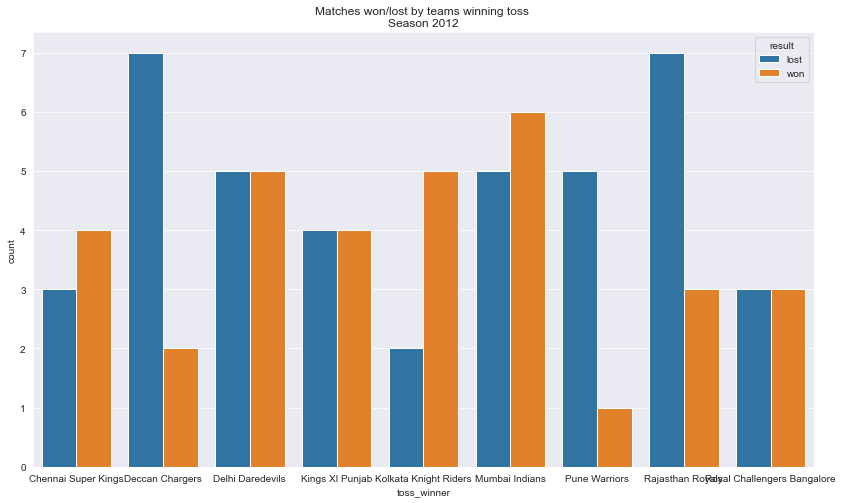

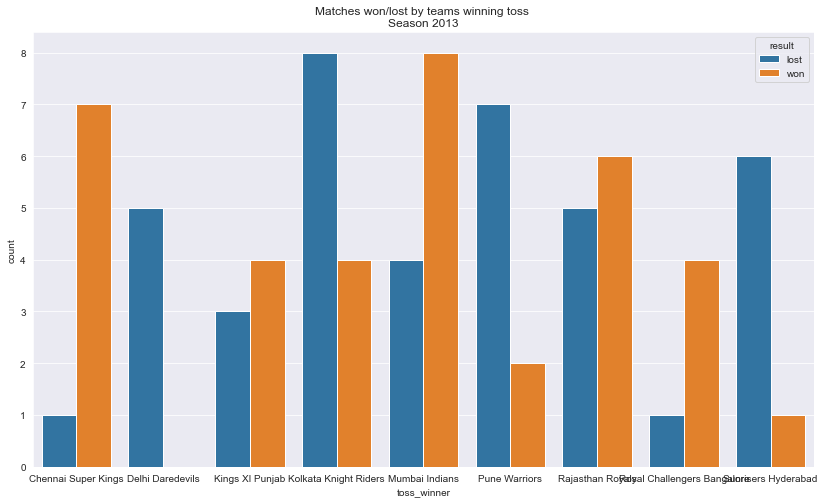

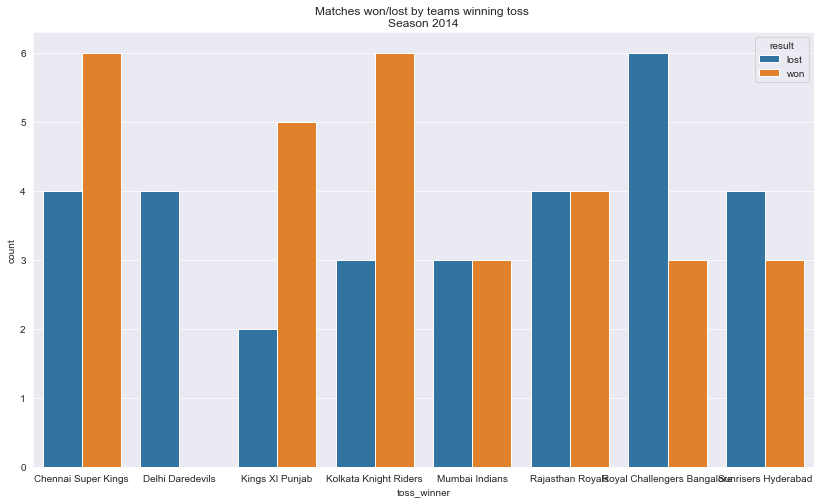

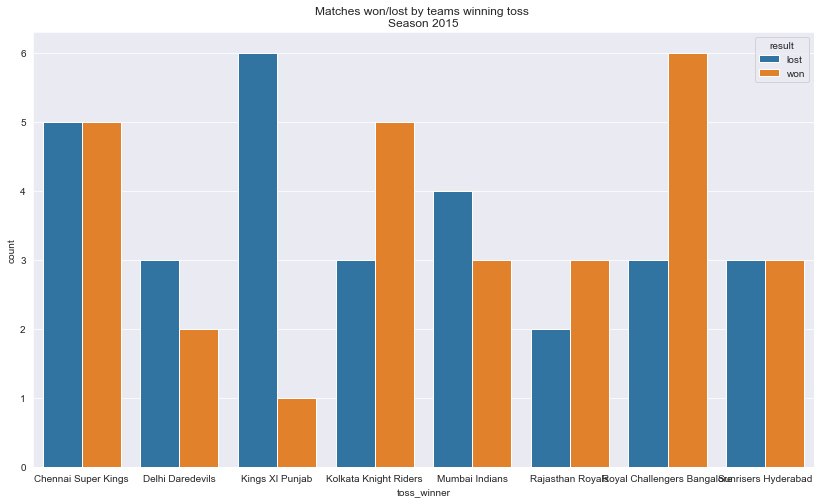

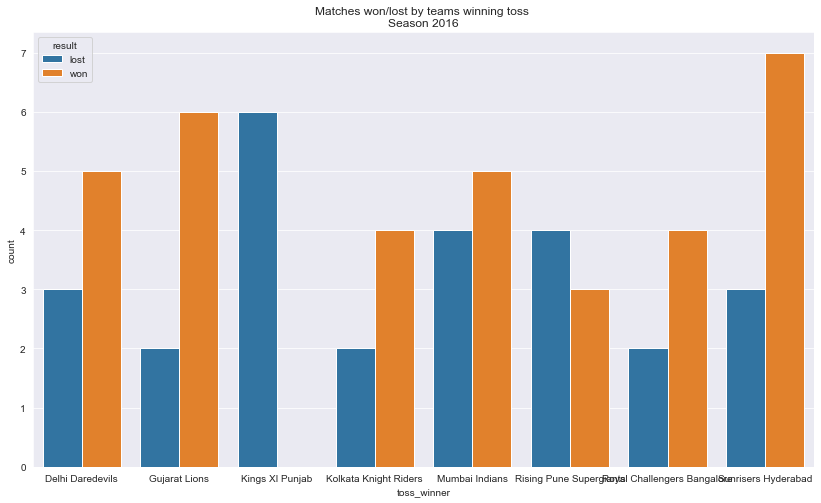

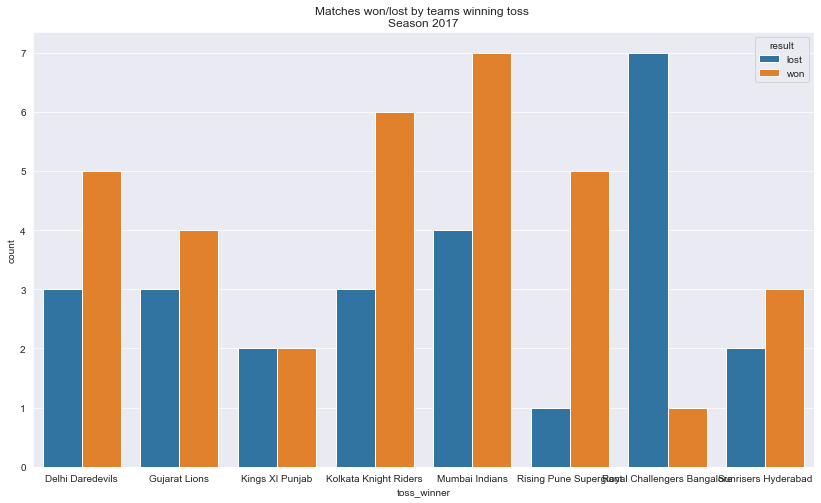

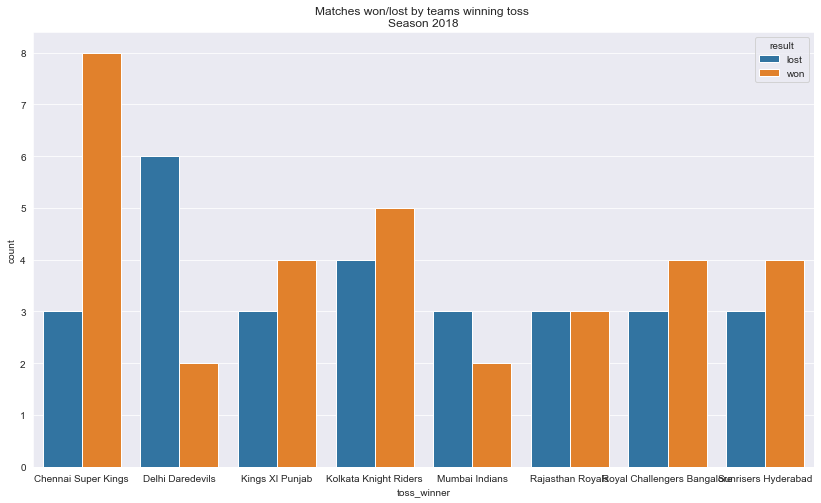

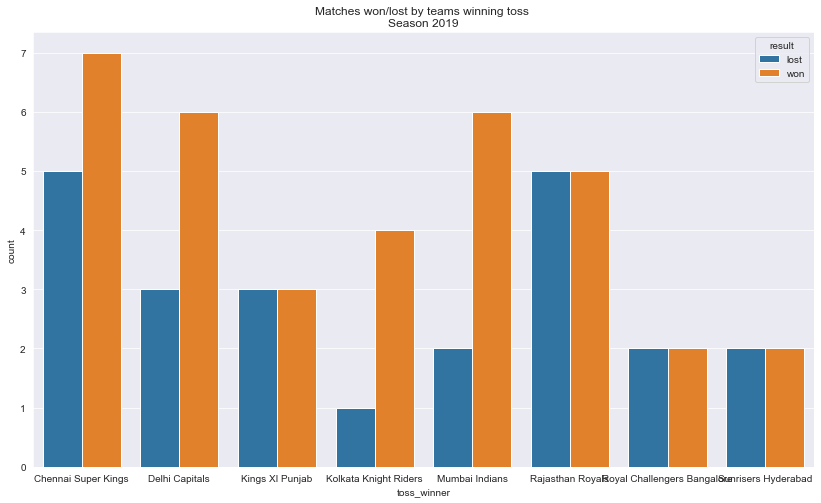

In [122]:
toss = matches_df.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['season', 'toss_winner','result'])['count'].sum().reset_index()

for x in range(2008, 2020, 1):
    toss_result_x = toss_result[toss_result['season'] == x]
    plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(x))
    plt.show()
    x+=1